In [1]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

1. На вход передатчика подается сигнал косинуса с частотами 50, 150 и 450 Гц. Определите спектр сигнала с помощью стандартной функции быстрого преобразования Фурье.

In [2]:
def cosinus(x, frequency=50, amplitude=2):
    w = 2 * np.pi * frequency
    return amplitude * np.cos(w * x)

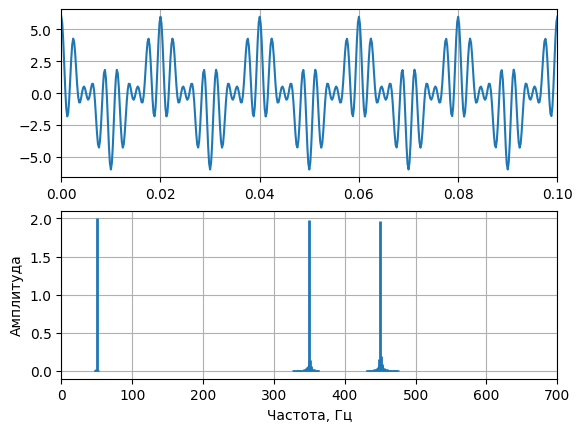

In [3]:
N = 5000
# создание сигнала
x = np.linspace(0, 1, N)
y = cosinus(x) + cosinus(x, frequency=350) + cosinus(x, frequency=450)

# дискретный спектр
y_fft = np.fft.rfft(y)
freq = np.fft.rfftfreq(N, 0.0002)
# print(len(freq), len(y_fft))

# график
fig, ax = plt.subplots(2)

# график сигнала
ax[0].plot(x, y)
ax[0].set_xlim(0, 0.1)

# график спектра
ax[1].vlines(freq, 0, abs(y_fft) / N * 2, linewidth=2)
ax[1].grid()
ax[1].set_xlabel('Частота, Гц')
ax[1].set_ylabel('Амплитуда')
ax[1].set_xlim(0, 700)
for a in ax.flat:  # сетка
    a.grid(True)
plt.show()

2. Реализовать алгоритм фильтра Баттерворта нижних частот 2-го порядка (ФНЧ) к сигналу из пункта 1, убедиться, что происходит подавление высоких частот сигнала 150 и 450 Гц. При моделировании ФНЧ воспользоваться формулой (32) из методички “Козулин Цифровая обработка сигналов Python.pdf”. Частоту среза фильтра Баттерворта подберите самостоятельно. В данном примере частота среза может варьироваться в диапазоне от 70 до 120 Гц.

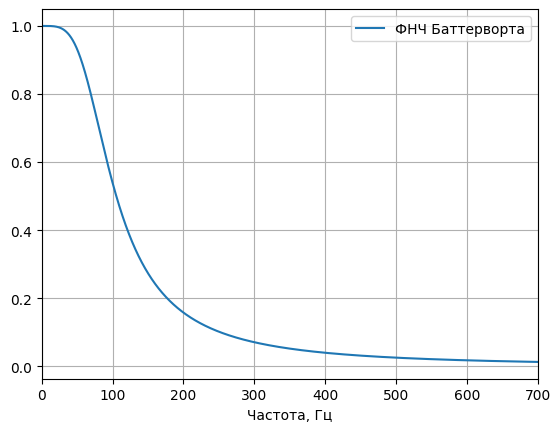

In [4]:
def low_pass_filter(w, wc):
    return wc ** 2 / (-w ** 2 + 1j * np.sqrt(2) * wc * w + wc ** 2)


w = np.linspace(0, 700, 10000)
wc = 80  # частота среза

plt.plot(w, abs(low_pass_filter(w, wc=wc)), label="ФНЧ Баттерворта")
plt.xlabel("Частота, Гц")
plt.grid()
plt.xlim(0, 700)
plt.legend()
plt.show()

Построить графики исходного и отфильтрованного сигнала, спектра сигнала и спектр фильтра Баттерворта. Убедитесь, что амплитуда исходного сигнала для частоты 50 Гц будет совпадать с амплитудой отфильтрованного сигнала.
Пример работы фильтра ФНЧ для сигнала с тремя частотами 1, 2 и 4 Гц представлен на рис 1.

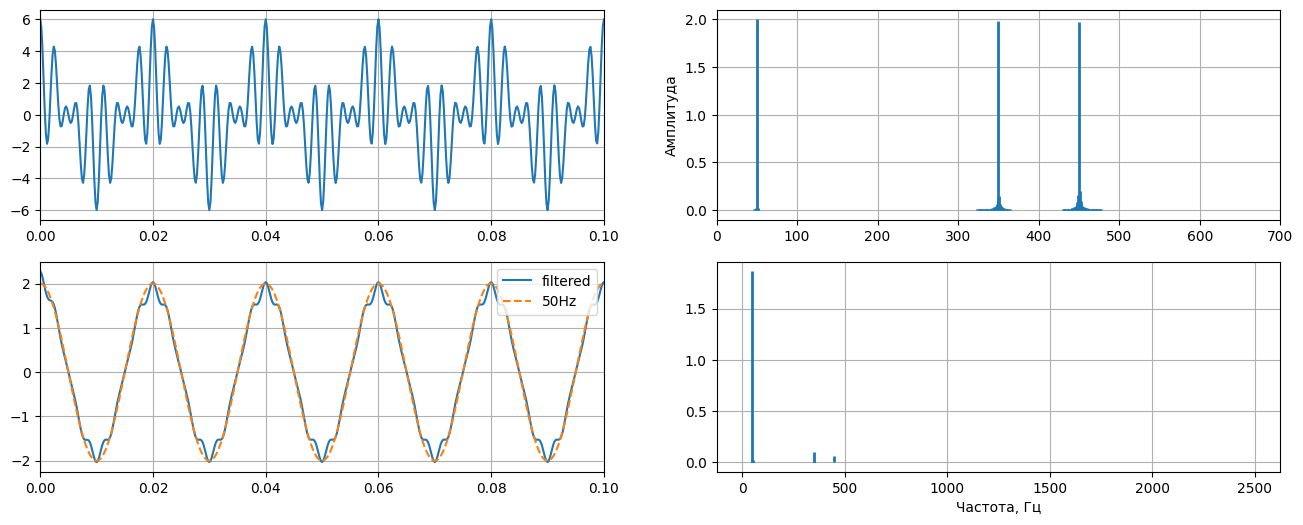

In [5]:
y_cos_50 = cosinus(x)  # сигнал для сравнения
# создание сигнала
# y_fft_lpf = y_fft * low_pass_filter(freq, wc)
y_fft_lpf = y_fft * abs(low_pass_filter(freq, wc))  # модуль, чтобы избежать сдвига по фазе

# график сигнала
fig, ax = plt.subplots(2, 2, figsize=(16, 6))
ax[0][0].plot(x, y)
ax[0][0].set_xlim(0, 0.1)

y_lpf = np.fft.irfft(y_fft_lpf)
ax[1][0].plot(x, y_lpf.real)  # отфильтрованный сигнал
ax[1][0].plot(x, y_cos_50, linestyle='dashed')  # сигнал для сравнения
ax[1][0].legend(["filtered", "50Hz"])
ax[1][0].set_xlim(0, 0.1)

# график спектра
ax[1][1].vlines(freq, 0, np.abs(y_fft_lpf) / N * 2, linewidth=2)  # спектр фильтрованого сигнала
ax[0][1].vlines(freq, 0, abs(y_fft) / N * 2, linewidth=2)
ax[1][1].set_xlabel('Частота, Гц')
ax[0][1].set_ylabel('Амплитуда')
ax[0][1].set_xlim(0, 700)
for a in ax:  # сетка
    for b in a:
        b.grid()
plt.show()

3. Оставьте в сигнале только 50 Гц и 450 Гц.
На этот же график нанесите Ваш отфильтрованный сигнал.

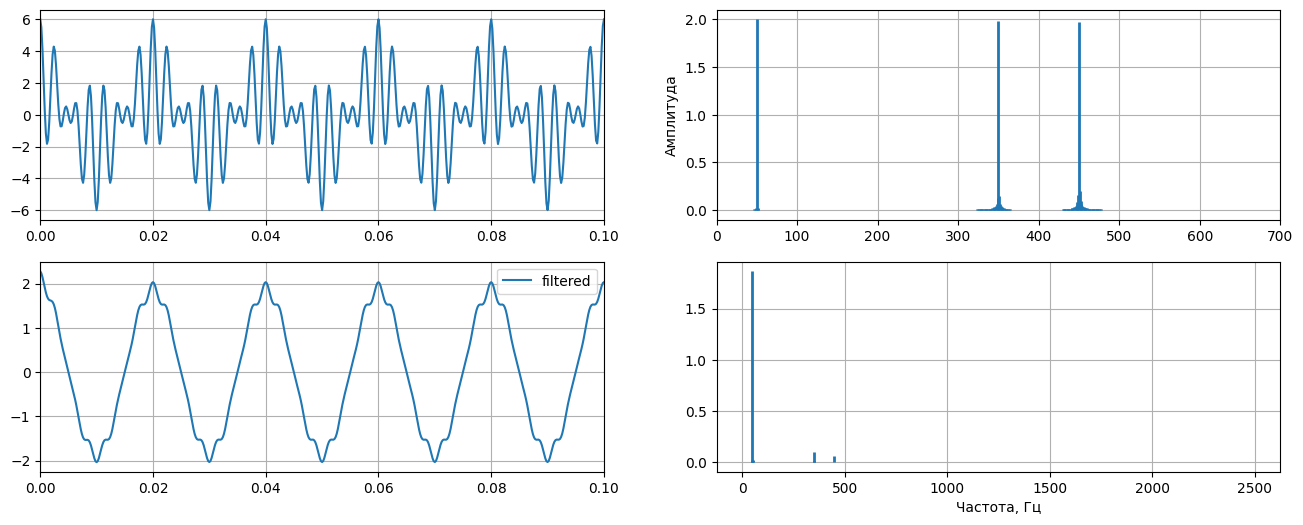

In [6]:
# создание сигнала
y_cos_50 = cosinus(x) + cosinus(x, frequency=450)
# y_fft_lpf = y_fft * low_pass_filter(freq, wc)
y_fft_lpf = y_fft * abs(low_pass_filter(freq, wc))  # модуль, чтобы избежать сдвига по фазе

# график сигнала
fig, ax = plt.subplots(2, 2, figsize=(16, 6))
ax[0][0].plot(x, y)
ax[0][0].set_xlim(0, 0.1)

y_lpf = np.fft.irfft(y_fft_lpf)
ax[1][0].plot(x, y_lpf.real)  # отфильтрованный сигнал
# ax[1][0].plot(x, y_cos_50, linestyle='dashed')  # сигнал для сравнения
ax[1][0].legend(["filtered", "50Hz"])
ax[1][0].set_xlim(0, 0.1)

# график спектра
ax[1][1].vlines(freq, 0, np.abs(y_fft_lpf) / N * 2, linewidth=2)  # спектр фильтрованого сигнала
ax[0][1].vlines(freq, 0, abs(y_fft) / N * 2, linewidth=2)
ax[1][1].set_xlabel('Частота, Гц')
ax[0][1].set_ylabel('Амплитуда')
ax[0][1].set_xlim(0, 700)
for a in ax:  # сетка
    for b in a:
        b.grid()
plt.show()

4. Построить фильтр высоких частот (ФВЧ) к сигналу, убедиться, что происходит подавление низких частот сигнала (50 и 150 Гц), воспользовавшись формулой (35) из методички “Козулин Цифровая обработка сигналов Python.pdf”.

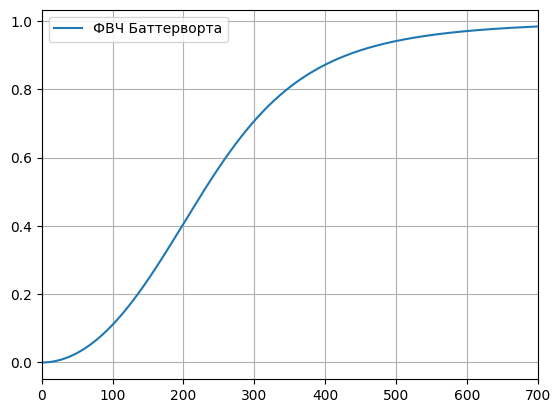

In [7]:
def high_pass_filter(w, wc):
    return w ** 2 / (-wc ** 2 + 1j * np.sqrt(2) * wc * w + w ** 2)


wc = 300  # частота среза

plt.plot(w, abs(high_pass_filter(w, wc=wc)), label="ФВЧ Баттерворта")
plt.grid()
plt.xlim(0, 700)
plt.legend()
plt.show()

Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтра ФНЧ.

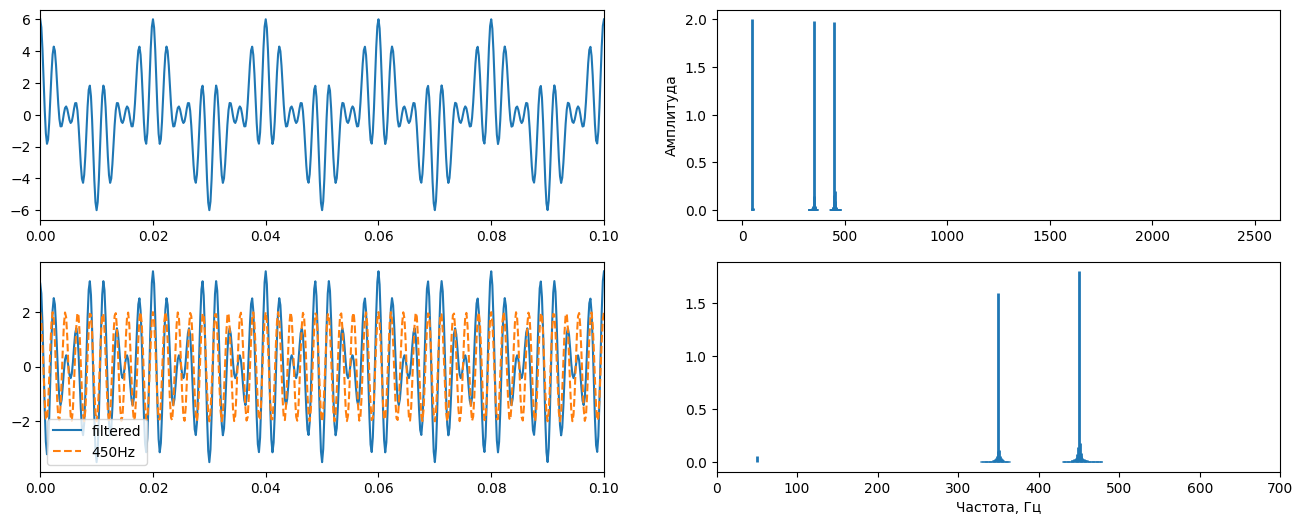

In [8]:
# создание сигнала
y_cos_450 = cosinus(x, frequency=450)
y_fft_hpf = y_fft * abs(high_pass_filter(freq, wc))  # модуль, чтобы избежать сдвига по фазе

fig, axs = plt.subplots(2, 2, figsize=(16, 6))

# график сигнала
axs[0][0].plot(x, y)
axs[0][0].set_xlim(0, 0.1)

y_hpf = np.fft.irfft(y_fft_hpf)
axs[1][0].plot(x, y_hpf.real)  # отфильтрованный сигнал
axs[1][0].plot(x, y_cos_450, linestyle='dashed')  # сигнал для сравнения
axs[1][0].legend(["filtered", "450Hz"])
axs[1][0].set_xlim(0, 0.1)

# график спектра
axs[1][1].vlines(freq, 0, np.abs(y_fft_hpf) / N * 2, linewidth=2)
axs[0][1].vlines(freq, 0, abs(y_fft) / N * 2, linewidth=2)
for a in ax:  # сетка
    for b in a:
        b.grid()
axs[1][1].set_xlabel('Частота, Гц')
axs[0][1].set_ylabel('Амплитуда')
axs[1][1].set_xlim(0, 700)
plt.show()

5. Построить полосовой фильтр и заграждающий фильтр (ПФ/ЗФ) настроенный на частоту 150Гц. При моделировании использовать формулы (36) и (37).
Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтров ПФ/ЗФ.

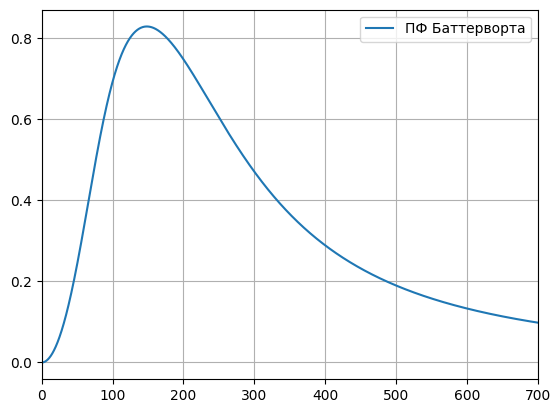

In [9]:
def band_pass_filter(w, w1, w2):  # полосовой фильтр пропускает определённый диапазон частот и подавляет все остальные
    return low_pass_filter(w, w2) * high_pass_filter(w, w1)


w1 = 100
w2 = 220

plt.plot(w, abs(band_pass_filter(w, w1, w2)), label="ПФ Баттерворта")
plt.grid()
plt.xlim(0, 700)
plt.legend()
plt.show()

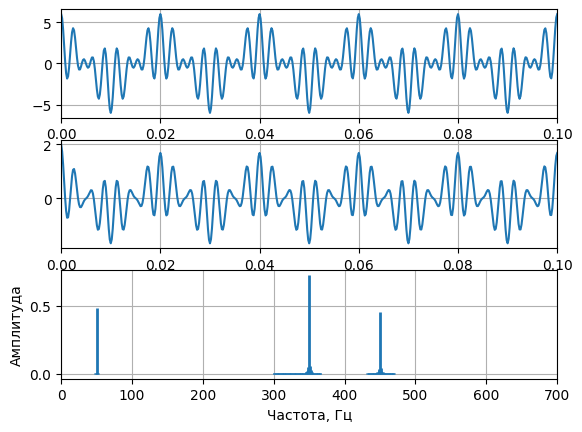

In [10]:
y_fft_lpf = y_fft * abs(band_pass_filter(freq, w1, w2))

fig, ax = plt.subplots(3)

# график сигнала
ax[0].plot(x, y)
ax[0].set_xlim(0, 0.1)

y_lpf = np.fft.irfft(y_fft_lpf)
ax[1].plot(x, y_lpf.real)
ax[1].set_xlim(0, 0.1)

# график спектра
ax[2].vlines(freq, 0, np.abs(y_fft_lpf) / N * 2, linewidth=2)
ax[2].set_xlabel('Частота, Гц')
ax[2].set_ylabel('Амплитуда')
ax[2].set_xlim(0, 700)

for a in ax:
    a.grid(True)
plt.show()

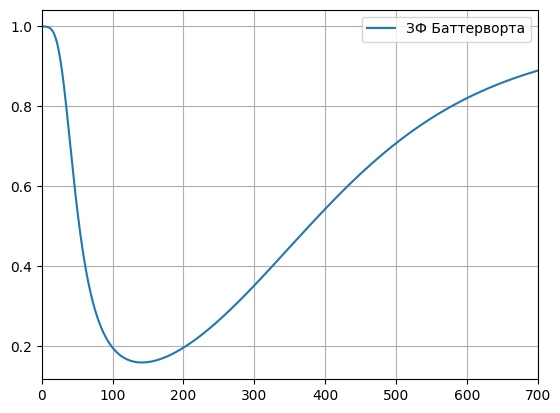

In [11]:
def band_stop_filter(w, w1, w2):  # заграждающий фильтр подавляет определённый диапазон частот, пропуская все остальные
    return low_pass_filter(w, w1) + high_pass_filter(w, w2)


w1 = 40
w2 = 500

plt.plot(w, abs(band_stop_filter(w, w1, w2)), label="ЗФ Баттерворта")
plt.grid()
plt.xlim(0, 700)
plt.legend()
plt.show()

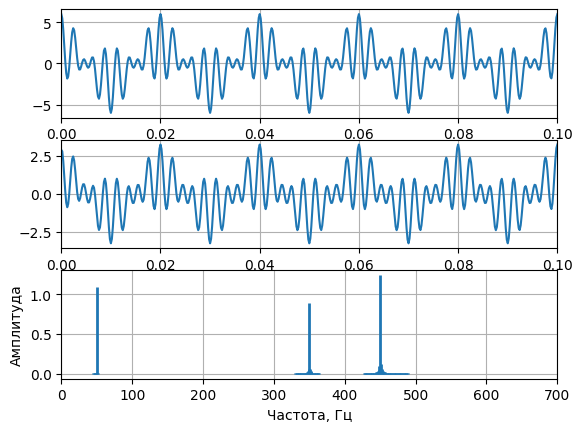

In [12]:
y_fft_noised_b = y_fft * abs(band_stop_filter(freq, w1, w2))

fig, ax = plt.subplots(3)

# график сигнала
ax[0].plot(x, y)
ax[0].set_xlim(0, 0.1)

yB = np.fft.irfft(y_fft_noised_b)
ax[1].plot(x, yB.real)
ax[1].set_xlim(0, 0.1)

# график спектра
ax[2].vlines(freq, 0, np.abs(y_fft_noised_b) / N * 2, linewidth=2)
ax[2].set_xlabel('Частота, Гц')
ax[2].set_ylabel('Амплитуда')
ax[2].set_xlim(0, 700)

for a in ax:
    a.grid()
plt.show()

6. Согласно формулам (28, 29) возможно построить фильтр Баттерворта любого порядка.
Постройте фильтр Баттерворта 4-го и 5-го порядка с автоматическим определением полюсов фильтра. Реализуйте пункт 1 данной лабораторной для Фильтра Баттерворт 5-го порядка.

примеч.: Полюсы передаточной функции обладают симметрией, а именно их число и конфигурация расположения в обеих полуплоскостях одинаковы. При этом физически реализуемому фильтру отвечают только полюсы, расположенные в левой полуплоскости.

(29) $H_n(S) = \dfrac 1 {(S − S_1) \cdot (S − S_2) \dots (S − S_n)}$

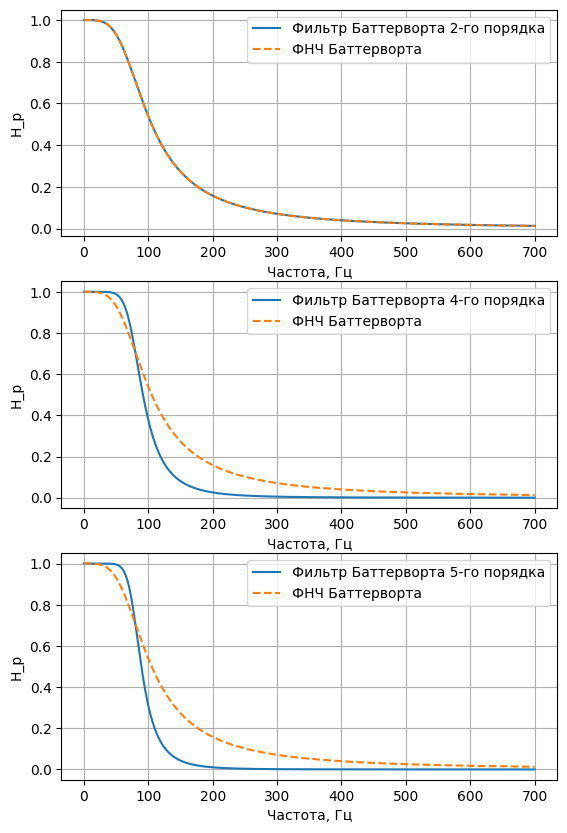

In [13]:
def H_p(w, wc, n):  # фильтр высоких частот порядка n
    s = 1j * w / wc
    poles = []  # полюса фильтра
    for k in range(n):
        pole = np.exp(1j * np.pi * (n + 2 * k + 1) / (2 * n))
        poles.append(pole)

    polynomial = 1  # полином из знаменателя
    for pole in poles:
        polynomial *= (s - pole)
    # print(f"Полюсы фильтра Баттерворта {n}-го порядка:", poles)
    return 1 / polynomial


wc = 80  # частота среза

ns = [2, 4, 5]
fig, axes = plt.subplots(len(ns))
fig.set_figheight(10)

for i, n in enumerate(ns):
    axes[i].plot(w, abs(H_p(w, wc, n)), label=f"Фильтр Баттерворта {n}-го порядка")
    axes[i].plot(w, abs(low_pass_filter(w, wc)), label="ФНЧ Баттерворта", linestyle='dashed')
    axes[i].set_xlabel("Частота, Гц")
    axes[i].set_ylabel("H_p")
    axes[i].legend()
    axes[i].grid()

plt.show()

7. Сравните реализованный Вами фильтр 5-го порядка с фильтром 2-го порядка, объясните разницу.

8. Сравните Ваш алгоритм ФНЧ Баттерворта 5-го порядка с встроенным фильтром Баттерворта библиотеки scipy.signal также для 5-го порядка используя.

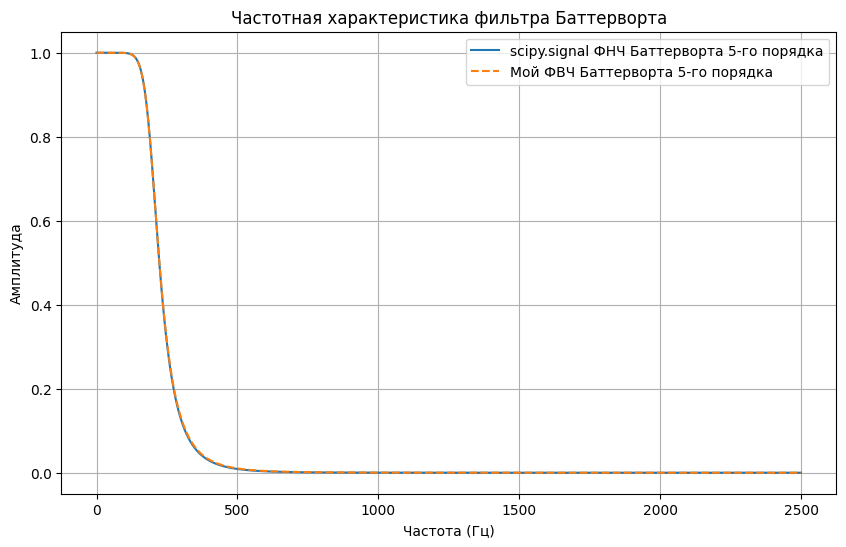

0.0018162727355957031
0.0


In [14]:
from scipy.signal import butter, lfilter, freqz
import time

order = 5  # порядок фильтра
cutoff_freq = 200  # частота среза фильтра в Гц
sampling_rate = 5000  # частота дискретизации в Гц

# нормализация частоты среза
nyquist_freq = 0.5 * sampling_rate
normal_cutoff = cutoff_freq / nyquist_freq

# создание фильтра Баттерворта
start_time_butter = time.time()
b, a = butter(order, normal_cutoff, btype='low', analog=False)

# вычисление частотной характеристики фильтра
w, h = freqz(b, a, worN=8000)
end_time_butter = time.time()

# преобразование нормализованной частоты в Гц
freq = 0.5 * sampling_rate * w / np.pi

# вычисление частотной характеристики с помощью вашей функции
w_custom = np.linspace(0, nyquist_freq, 8000)
start_time_H_p = time.time()
h_custom = abs(H_p(w_custom, cutoff_freq, order))
end_time_H_p = time.time()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(freq, abs(h), label=f'scipy.signal ФНЧ Баттерворта {order}-го порядка')
plt.plot(w_custom, h_custom, label=f'Мой ФВЧ Баттерворта {order}-го порядка', linestyle='dashed')
# plt.plot(w_custom, h_custom, label=f'Мой ФВЧ Баттерворта {order}-го порядка')
plt.title('Частотная характеристика фильтра Баттерворта')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()
print(end_time_butter - start_time_butter)
print(end_time_H_p - start_time_H_p)

In [15]:
N = 5000
# создание сигнала
x = np.linspace(0, 1, N)
y = cosinus(x) + cosinus(x, frequency=150) + cosinus(x, frequency=450)

# дискретный спектр
y_fft = np.fft.rfft(y)
freq = np.fft.rfftfreq(N, 0.0002)
# print(len(freq), len(y_fft))

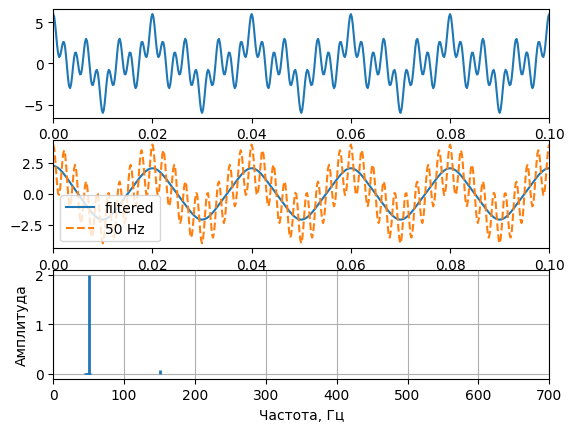

In [16]:
y_fft_noised_b = y_fft * abs(H_p(freq, wc, 5)) # модуль, чтобы избежать сдвига по фазе

fig, axs = plt.subplots(3)

# график сигнала
axs[0].plot(x, y)
axs[0].set_xlim(0, 0.1)

yB = np.fft.irfft(y_fft_noised_b).real
axs[1].plot(x, yB)
axs[1].plot(x, y_cos_50, linestyle='dashed')
axs[1].legend(["filtered", "50 Hz"]) 
axs[1].set_xlim(0, 0.1)

# график спектра
axs[2].vlines(freq, 0, np.abs(y_fft_noised_b) / N * 2, linewidth=2)
axs[2].grid()
axs[2].set_xlabel('Частота, Гц')
axs[2].set_ylabel('Амплитуда')
axs[2].set_xlim(0, 700)

plt.show()

*Порядок фильтра определяет его крутизну спада характеристики в полосе задерживания

9. Добавить шум к исходному сигналу, посмотрите как происходит фильтрация для
зашумленного сигнала.

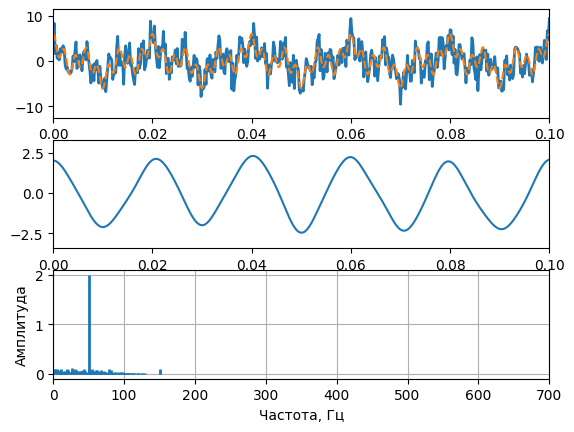

In [17]:
# зашумленный сигнал
def add_noise(signal, noise_level=1):  # добавление к сигналу гауссовского шума 
    return signal + np.random.normal(0, noise_level, signal.shape)


y_cos_noised = add_noise(y, 2)

y_fft_noised = np.fft.rfft(y_cos_noised)
y_fft_noised_b = y_fft_noised * abs(H_p(freq, wc, n))  # модуль, чтобы избежать сдвига по фазе

fig, axs = plt.subplots(3)

# график сигнала
axs[0].plot(x, y_cos_noised, linewidth=2)
axs[0].plot(x, y, linestyle='dashed')
axs[0].set_xlim(0, 0.1)

yB = np.fft.irfft(y_fft_noised_b).real  # обратное преобразование
axs[1].plot(x, yB)
axs[1].set_xlim(0, 0.1)

# график спектра
axs[2].vlines(freq, 0, np.abs(y_fft_noised_b) / N * 2, linewidth=2)
axs[2].grid()
axs[2].set_xlabel('Частота, Гц')
axs[2].set_ylabel('Амплитуда')
axs[2].set_xlim(0, 700)

plt.show()